In [15]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression

## GET_DUMMIES TTMENT

In [3]:
gdum =  pd.read_csv("outputs/gdum.csv")
predgdum = pd.read_csv("outputs/predgdum.csv")
predgdum

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.36,54.0,8.68,8.57,5.24,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2.04,56.0,8.18,8.23,5.09,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.51,54.0,5.18,5.19,3.20,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.30,56.0,4.32,4.33,2.65,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0.96,56.0,6.11,5.98,4.16,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.53,59.0,5.23,5.17,3.16,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
13481,1.01,60.0,6.32,6.38,3.99,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
13482,0.92,58.0,6.29,6.26,3.81,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
13483,0.39,54.0,4.70,4.72,2.92,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
gdum.columns

Index(['carat', 'table', 'x', 'y', 'z', 'price', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [8]:
Xd =gdum[['carat', 'table','x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']]
yd = gdum["price"]

In [9]:
X_traind, X_testd, y_traind, y_testd = train_test_split(Xd, yd, test_size=0.2)

## Nearest Neighbors Regression: KNeighborsRegression, interesante

### test with gdum, worse than with 7 vv

In [23]:
neighd = KNeighborsRegressor(n_neighbors=5, weights= "distance", p = 1)
neighd.fit(X_traind, y_traind)
y_predd = neighd.predict(X_testd)
print(mean_squared_error(y_testd, y_predd, squared = False))
print(neighd.score(X_traind, y_traind))
print(neighd.score(X_testd, y_testd))

791.430381211043
0.9999956011862405
0.9602395033948276


### To test the model with 7 vv


In [24]:
neigh1 = KNeighborsRegressor(n_neighbors=8, weights= "distance", p = 1)
neigh1.fit(X_train1, y_train1)
y_pred1 = neigh1.predict(X_test1)
print(mean_squared_error(y_test1, y_pred1, squared = False))
print(neigh1.score(X_train1, y_train1))
print(neigh1.score(X_test1, y_test1))


692.8229478533498
0.9999894482577966
0.970182508059029


### To submit the model.
### PREPARED TO SUBMIT WITH 7 VV

In [25]:
neighf = KNeighborsRegressor(n_neighbors=3, weights= "distance", p = 1)
neighf.fit(X_ready1, y1)
y_pred1 = neighf.predict(predict3)
predKN = pd.DataFrame(y_pred1)
predKN.rename(columns={0: 'price'}, inplace=True)
predKN.index.names = ['id']
predKN.to_csv("outputs/KN_norm&7vparamLun.csv")

 ## RandomForest Regression Model

### To test the model dum: descartado

In [48]:
regrd = RandomForestRegressor(max_depth=20, n_estimators=900)
regrd.fit(X_traind, y_traind)
y_predRFd = regrd.predict(X_testd)


In [49]:
print(mean_squared_error(y_testd, y_predRFd, squared = False))
print(regrd.score(X_traind, y_traind))
print(regrd.score(X_testd, y_testd))

554.1223748790417
0.9972744965623747
0.9807040677512833


### To submit the model To submit

In [52]:
rfr = RandomForestRegressor(max_depth=20, n_estimators=900)
rfr.fit(Xd, yd)
y_predrfr = rfr.predict(predgdum)
predrfr = pd.DataFrame(y_predrfr)
predrfr.rename(columns={0: 'price'}, inplace=True)
predrfr.index.names = ['id']
predrfr.to_csv("outputs/RFdummies.csv")

# Gradient Boosting Regressor Model

## TEST MODEL WITH GET DUMMIES THE BEST!!

In [42]:
regd = GradientBoostingRegressor(n_estimators = 700, min_samples_split = 3, learning_rate = 0.3, )
regd.fit(X_traind, y_traind)
GBRd = regd.predict(X_testd)

In [43]:
print(mean_squared_error(y_testd, GBRd, squared = False))
train_score = regd.score(X_traind, y_traind)
print(train_score)
test_score = regd.score(X_testd, y_testd)
print(test_score)

576.6152970169561
0.9894210901086262
0.9791057536422331


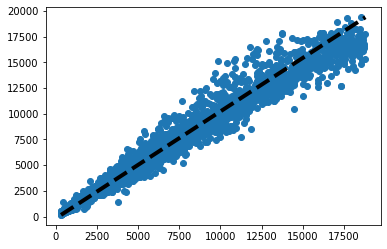

In [29]:
plt.pyplot.scatter(y_testd,GBRd)
plt.pyplot.plot([y_testd.min(), y_testd.max()], [GBRd.min(), GBRd.max()], 'k--', lw=4)
    



## SUBMIT BOOSTING MODEL WITH GET DUMMIES

In [12]:
GB = GradientBoostingRegressor(n_estimators = 870, min_samples_split = 3, learning_rate = 0.3)
GB.fit(Xd, yd)
y_predGB = GB.predict(predgdum)
predGB = pd.DataFrame(y_predGB)
predGB.rename(columns={0: 'price'}, inplace=True)
predGB.index.names = ['id']
predGB.to_csv("outputs/gradBoostGETDUM.csv")

### To test the model

In [70]:

reg = GradientBoostingRegressor(n_estimators = 800)
reg.fit(X_train1, y_train1)
GBR = reg.predict(X_test1)

In [71]:
print(mean_squared_error(y_test1, GBR, squared = False))
print(reg.score(X_train1, y_train1))
print(reg.score(X_test1, y_test1))

720.9777016576404
0.9243601485451908
0.9275675788985303


### submitted model 

In [10]:
gradBR = GradientBoostingRegressor(n_estimators = 800)
gradBR.fit(X_ready1, y1)
y_predgBR = gradBR.predict(predict3)
predBR = pd.DataFrame(y_predgBR)
predBR.rename(columns={0: 'price'}, inplace=True)
predBR.index.names = ['id']
predBR.to_csv("outputs/gradBoost.csv")

## Neural Network Regression: no

### To test the model

In [34]:
Neu_Ntwk= MLPRegressor(random_state=0, max_iter= 500, solver = "adam").fit(X_train1, y_train1)
y_predNtwk = Neu_Ntwk.predict(X_test1)
print(mean_squared_error(y_test1, y_predNtwk, squared = False))
print(Neu_Ntwk.score(X_train1, y_train1))
print(Neu_Ntwk.score(X_test1, y_test1))

1065.481364215783
0.9243601485451908
0.9275675788985303


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### To submit the model (to submit)

In [73]:
ntwk= MLPRegressor(random_state=0, max_iter= 500, solver = "adam").fit(X_ready1, y1)
y_prednt = ntwk.predict(predict3)
predntwk = pd.DataFrame(y_prednt)
predntwk.rename(columns={0: 'price'}, inplace=True)
predntwk.index.names = ['id']
#predntwk.to_csv("outputs/neurntwktrained.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Generalized Linear Regression: no


### With more variables

In [33]:
reg1 = TweedieRegressor(power=0, alpha=0.5, link='log')
reg1.fit(X_train1, y_train1)
reg1.coef_
reg1.intercept_

7.972535803526908

In [34]:
y_predGLM1 = reg.predict(X_test)


In [139]:
print(mean_squared_error(y_test1, y_predGLM1))
print(reg1.score(X_train1, y_train1))
print(reg1.score(X_test1, y_test1))

4.829361676574384e+26
0.8976866877501805
0.8934744480833794
